In [1]:
import pandas as pd 

df_no_outliers_2009_12_2010 = pd.read_csv('df_no_outliers_2009_12_2010.csv')

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

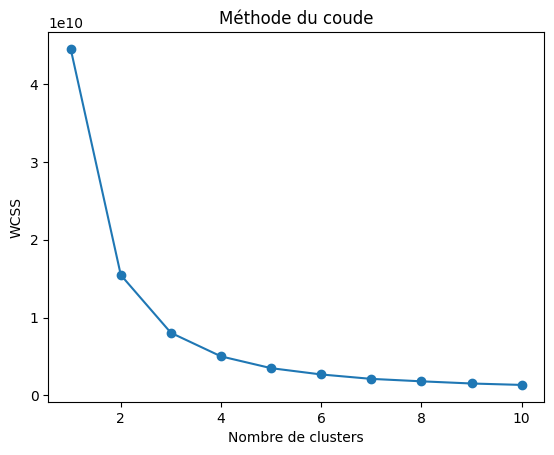

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


variables = ['NombreCommandes','MontantTotal_y','Recency','PanierMoyen','PourcentageAnnulationMontant']
# Préparer les données et effectuer la normalisation
X = df_no_outliers_2009_12_2010[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Liste pour stocker les valeurs des indices de performance (WCSS) pour différents nombres de clusters
wcss = []

# Définir une plage de valeurs pour le nombre de clusters à tester
range_clusters = range(1, 11)

# Appliquer K-means pour différents nombres de clusters et calculer l'indice de performance (WCSS)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la courbe de la méthode du coude
plt.plot(range_clusters, wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


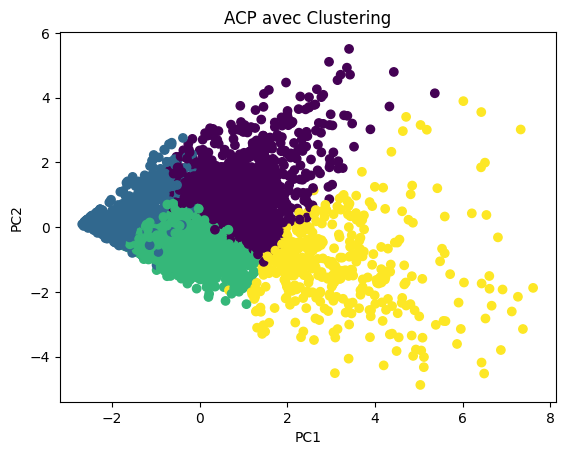

,NombreCommandes,MontantTotal_y,Recency,PanierMoyen,PourcentageAnnulationMontant
0,3.011314,2674.212742,422.637076,991.533273,56.929965
1,1.569560,509.018371,611.727705,311.714089,11.547299
2,3.311768,1147.012320,406.579476,347.374234,14.560145
3,12.869458,9784.501749,373.435961,876.218269,41.772148


In [9]:
import pandas as pd

df_names = [
    '2009_12_2010',
    '2009_01_2011',
    '2009_02_2011',
    '2009_03_2011',
    '2009_04_2011',
    '2009_05_2011',
    '2009_06_2011',
    '2009_07_2011',
    '2009_08_2011',
    '2009_09_2011',
    '2009_10_2011',
    '2009_11_2011',
    '2009_12_2011'
]

df_list_no_outliers = []

for df_name in df_names:
    df_no_outliers = pd.read_csv(f"df_no_outliers_{df_name}.csv")
    df_list_no_outliers.append(df_no_outliers)

# Now you have a list of DataFrames (df_list_no_outliers) containing the retrieved data from the CSV files.


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


variables = ['NombreCommandes', 'MontantTotal_y', 'Recency', 'PanierMoyen', 'PourcentageAnnulationMontant']
k = 4

# Définition de la fonction perform_segmentation
def perform_segmentation(df, variables, k):
    # Préparation des données et normalisation
    X = df[variables]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Application de l'algorithme K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Ajout des informations de segmentation au DataFrame d'origine
    df['Segment'] = kmeans.labels_

    # Analyse des caractéristiques des clusters
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    df_cluster_centers = pd.DataFrame(cluster_centers, columns=variables)

    pca = PCA()
    X = pca.fit_transform(X_scaled)

    # Affichage du scatter plot des composantes principales avec une couleur pour chaque cluster
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('ACP avec Clustering')
    plt.show()

    # Stockage des segments pour chaque client dans un dictionnaire
    segments_by_customer = {}
    for customer_id, segment in zip(df['Customer ID'], df['Segment']):
        segments_by_customer.setdefault(customer_id, []).append(segment)

    return df_cluster_centers

perform_segmentation(df_no_outliers_2009_12_2010,variables,k)



/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


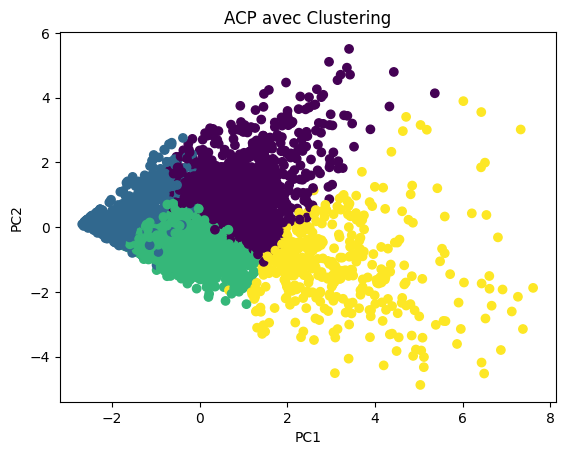

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


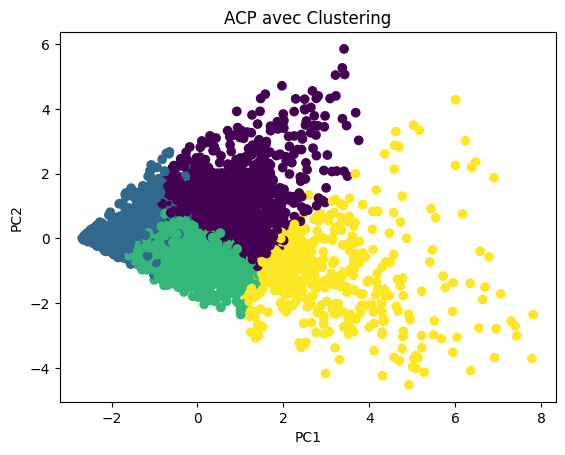

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


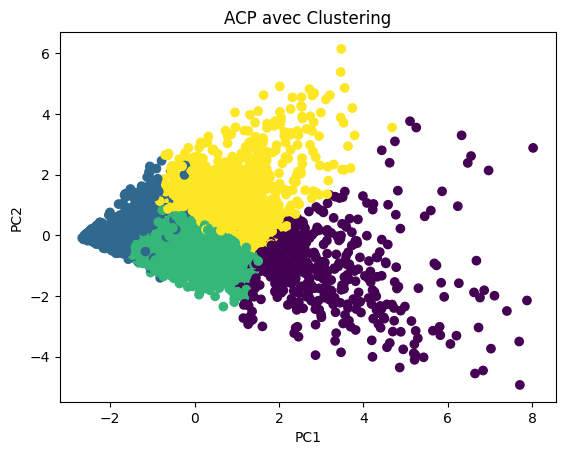

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


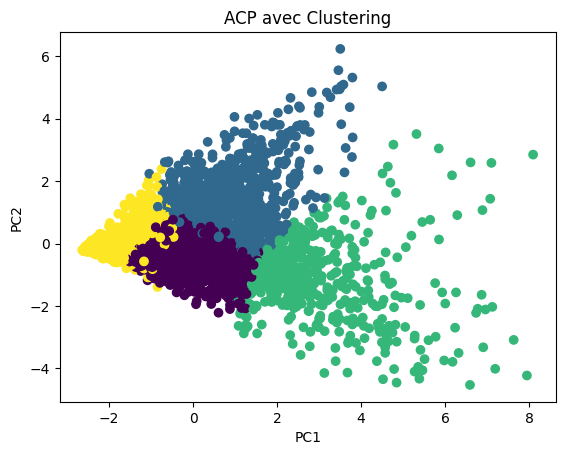

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


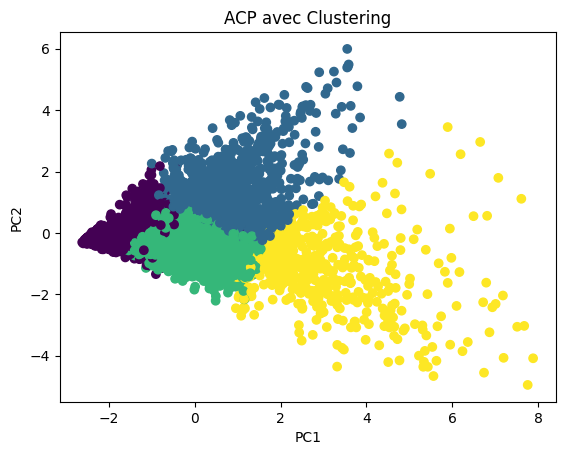

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


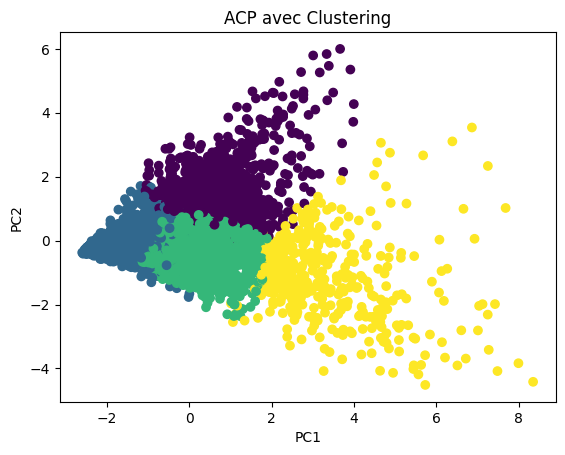

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


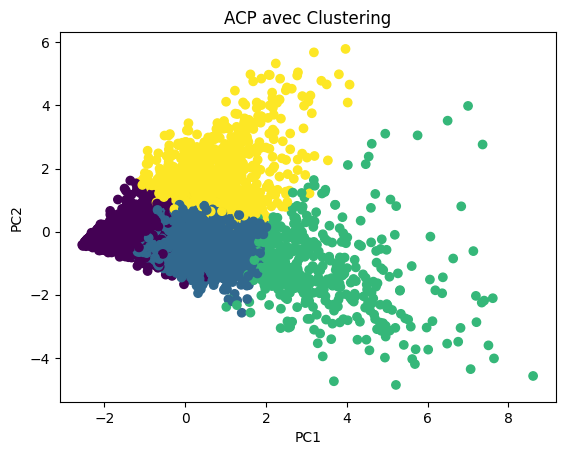

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


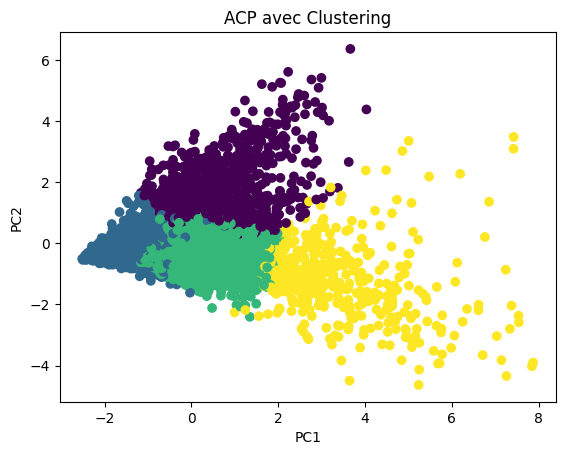

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


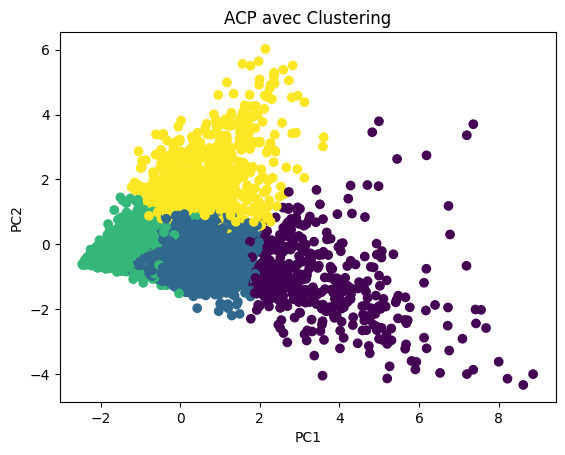

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


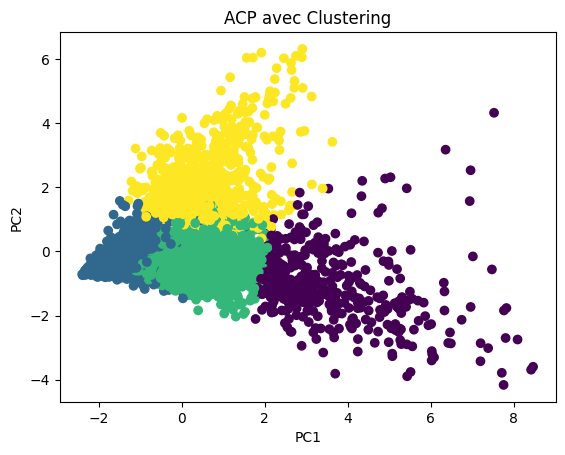

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


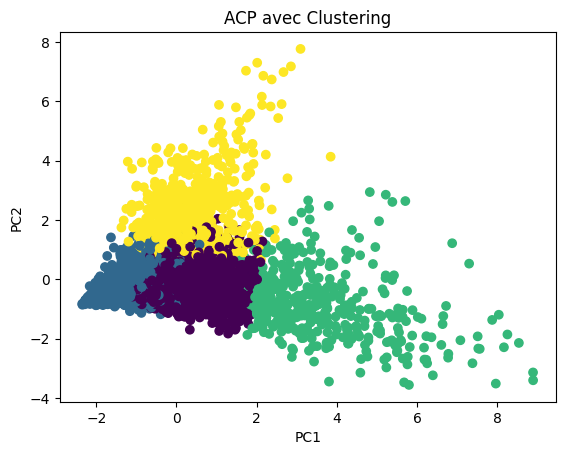

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


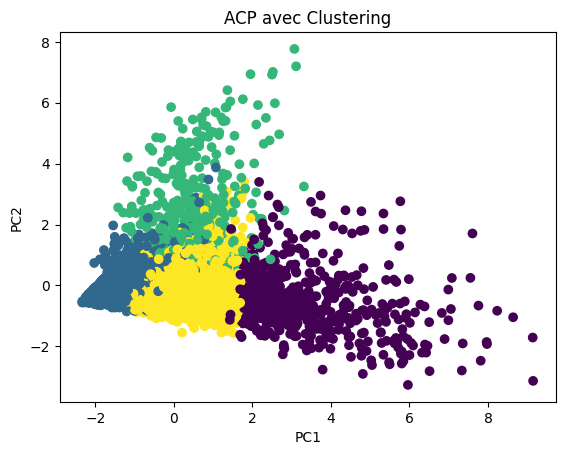

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


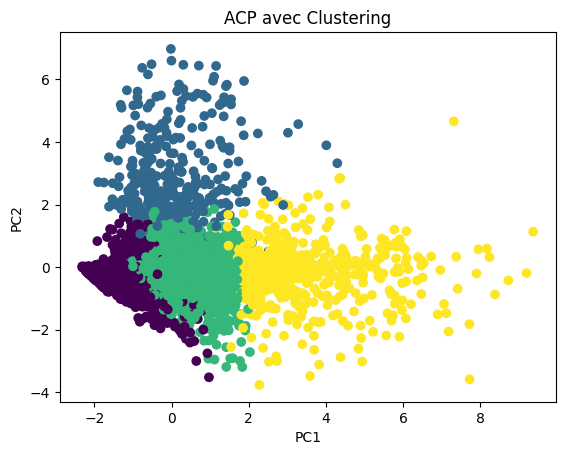

In [10]:
for df in df_list_no_outliers:
    perform_segmentation(df, variables, k)

In [11]:
import pandas as pd

# Supposons que vous ayez une liste de DataFrames

# Colonnes à conserver dans le DataFrame final
columns_to_keep = ["Customer ID",'Segment']

# Fusionner les DataFrames en utilisant merge()
merged_df = df_list_no_outliers[0][columns_to_keep]
merged_df.rename(columns={"Segment": "Segment"}, inplace=True)  # Renommer la colonne du premier segment de référence

for i in range(1, len(df_list_no_outliers)):
    suffix = f" {i}"  # Suffixe personnalisé pour les colonnes
    df = df_list_no_outliers[i][["Customer ID", "Segment"]]
    df.rename(columns={"Segment": f"Segment{suffix}"}, inplace=True)  # Renommer la colonne du segment actuel
    merged_df = pd.merge(merged_df, df, on="Customer ID", how="left")

# Afficher le DataFrame fusionné
print(merged_df)





      Customer ID  Segment  Segment 1  Segment 2  Segment 3  Segment 4  \
0         12347.0        0        0.0        3.0        1.0        1.0   
1         12348.0        0        2.0        2.0        0.0        2.0   
2         12349.0        0        0.0        3.0        1.0        1.0   
3         12351.0        2        2.0        2.0        0.0        2.0   
4         12352.0        0        0.0        3.0        0.0        1.0   
...           ...      ...        ...        ...        ...        ...   
4184      18283.0        0        0.0        3.0        1.0        1.0   
4185      18284.0        2        2.0        2.0        0.0        2.0   
4186      18285.0        1        1.0        1.0        3.0        0.0   
4187      18286.0        2        2.0        2.0        3.0        0.0   
4188      18287.0        0        0.0        3.0        1.0        1.0   

      Segment 5  Segment 6  Segment 7  Segment 8  Segment 9  Segment 10  \
0           0.0        3.0        0.

/tmp/ipykernel_53065/4040324673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns={"Segment": "Segment"}, inplace=True)  # Renommer la colonne du premier segment de référence
/tmp/ipykernel_53065/4040324673.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Segment": f"Segment{suffix}"}, inplace=True)  # Renommer la colonne du segment actuel
/tmp/ipykernel_53065/4040324673.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [12]:
from sklearn.metrics.cluster import adjusted_rand_score

# Obtenez le segment de référence à partir du DataFrame fusionné
initial_segment = "Segment"
initial_segment_list = merged_df[initial_segment].values.tolist()

# Boucle pour comparer chaque segment avec le segment de référence
for column in merged_df.columns:
    if column != "Customer ID" and column != initial_segment:
        segment = merged_df[column].values.tolist()

        # Créer un masque pour filtrer les lignes avec des valeurs NaN dans les colonnes de segment
        mask = ~pd.isnull(segment)

        # Filtrer les listes segment et initial_segment_list
        segment_filtered = [segment[i] for i in range(len(segment)) if mask[i]]
        initial_segment_filtered = [initial_segment_list[i] for i in range(len(segment)) if mask[i]]

        ari = adjusted_rand_score(initial_segment_filtered, segment_filtered)
        print(f"ARI between {initial_segment} and {column}: {ari}")


ARI between Segment and Segment 1: 0.8497466862525905
ARI between Segment and Segment 2: 0.7365595020455644
ARI between Segment and Segment 3: 0.6065874311621048
ARI between Segment and Segment 4: 0.5363776650489589
ARI between Segment and Segment 5: 0.28948986067895105
ARI between Segment and Segment 6: 0.27331909301983054
ARI between Segment and Segment 7: 0.26958903327996986
ARI between Segment and Segment 8: 0.26590349501435895
ARI between Segment and Segment 9: 0.26505884882768266
ARI between Segment and Segment 10: 0.2606129829497206
ARI between Segment and Segment 11: 0.24892898019229462
ARI between Segment and Segment 12: 0.23759629217371595


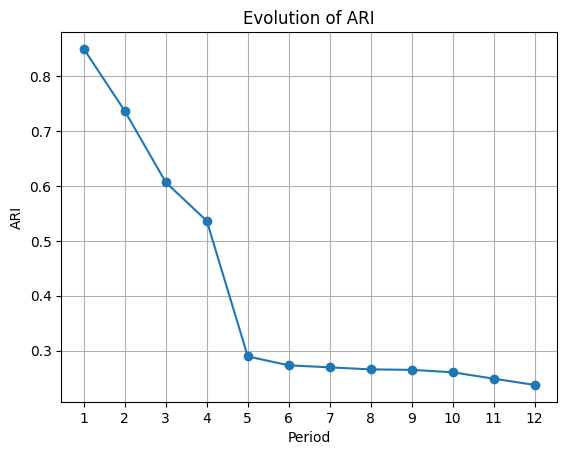

In [13]:
import matplotlib.pyplot as plt

# Liste pour stocker les valeurs d'ARI
ari_values = []

# Boucle pour calculer les ARI et les ajouter à la liste
for column in merged_df.columns:
    if column != "Customer ID" and column != initial_segment:
        segment = merged_df[column].values.tolist()

        # Créer un masque pour filtrer les lignes avec des valeurs NaN dans les colonnes de segment
        mask = ~pd.isnull(segment)

        # Filtrer les listes segment et initial_segment_list
        segment_filtered = [segment[i] for i in range(len(segment)) if mask[i]]
        initial_segment_filtered = [initial_segment_list[i] for i in range(len(segment)) if mask[i]]

        ari = adjusted_rand_score(initial_segment_filtered, segment_filtered)
        ari_values.append(ari)

# Tracer le graphique
plt.plot(range(1, len(ari_values)+1), ari_values, marker='o')
plt.xlabel("Period")
plt.ylabel("ARI")
plt.title("Evolution of ARI")
plt.xticks(range(1, len(ari_values)+1))
plt.grid(True)
plt.show()


In [34]:
import plotly.express as px
import pandas as pd

# Créer un DataFrame avec les valeurs des clusters
df = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'NombreCommandes': [3.011314, 1.569560, 3.311768, 12.869458],
    'MontantTotal_y': [2674.212742, 509.018371, 1147.012320, 9784.501749],
    'Recency': [422.637076, 611.727705, 406.579476, 373.435961],
    'PanierMoyen': [991.533273, 311.714089, 347.374234, 876.218269],
    'PourcentageAnnulationMontant': [56.929965, 11.547299, 14.560145, 41.772148]
})

# Définir les variables pour le graphique radar
variables = ['NombreCommandes', 'MontantTotal_y', 'Recency', 'PanierMoyen', 'PourcentageAnnulationMontant']

# Définir les échelles personnalisées pour chaque variable
scales = {
    'NombreCommandes': [0, 5],
    'MontantTotal_y': [0, 3000],
    'Recency': [0, 500],
    'PanierMoyen': [0, 1000],
    'PourcentageAnnulationMontant': [0, 100]
}


# Créer un DataFrame pour le graphique radar
df_radar = pd.melt(df, id_vars='Cluster', value_vars=variables, var_name='Variable', value_name='Value')

# Standardiser les variables
df_radar['Value'] = (df_radar['Value'] - df_radar['Value'].mean()) / df_radar['Value'].std()

# Créer le graphique en radar
fig = px.line_polar(df_radar, r='Value', theta='Variable', line_close=True, color='Cluster',
                    color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(fill='toself')

# Définir les échelles personnalisées pour chaque variable
for variable, scale in scales.items():
    fig.update_layout(polar_radialaxis_range=[scale])
    
# Afficher le graphique
fig.show()


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ValueError: 
    Invalid value of type 'builtins.list' received for the 'range' property of layout.polar.radialaxis
        Received value: [[0, 5]]

    The 'range' property is an info array that may be specified as:

    * a list or tuple of 2 elements where:
(0) The 'range[0]' property accepts values of any type
(1) The 'range[1]' property accepts values of any type

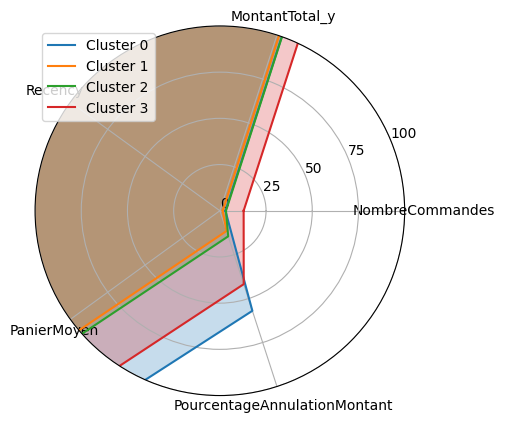

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Données des variables
variables = ['NombreCommandes', 'MontantTotal_y', 'Recency', 'PanierMoyen', 'PourcentageAnnulationMontant']

# Données des valeurs pour chaque variable
cluster0 = [3.011314, 2674.212742, 422.637076, 991.533273, 56.929965]
cluster1 = [1.56956, 509.018371, 611.727705, 311.714089, 11.547299]
cluster2 = [3.311768, 1147.01232, 406.579476, 347.374234, 14.560145]
cluster3 = [12.869458, 9784.501749, 373.435961, 876.218269, 41.772148]

# Échelles personnalisées pour chaque variable
scales = {
    'Variable 1': (0, 15),
    'Variable 2': (0, 12000),
    'Variable 3': (0, 700),
    'Variable 4': (0, 1500),
    'Variable 5': (0, 100)
}

# Créer une figure et un axe de type polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Nombre de variables
num_vars = len(variables)

# Calculer les angles pour chaque variable
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()

# Ajouter le premier angle à la fin pour fermer le polygone
angles.append(angles[0])

# Créer les ticks et les étiquettes des angles
plt.xticks(angles[:-1], variables)

# Configurer les échelles pour chaque variable
for var, scale in scales.items():
    ax.set_rticks(np.linspace(scale[0], scale[1], 5))
    ax.set_ylim(scale)

# Plot des données pour chaque cluster
ax.plot(angles, cluster0 + [cluster0[0]], label='Cluster 0')
ax.plot(angles, cluster1 + [cluster1[0]], label='Cluster 1')
ax.plot(angles, cluster2 + [cluster2[0]], label='Cluster 2')
ax.plot(angles, cluster3 + [cluster3[0]], label='Cluster 3')

# Remplissage des polygones
ax.fill(angles, cluster0 + [cluster0[0]], alpha=0.25)
ax.fill(angles, cluster1 + [cluster1[0]], alpha=0.25)
ax.fill(angles, cluster2 + [cluster2[0]], alpha=0.25)
ax.fill(angles, cluster3 + [cluster3[0]], alpha=0.25)

# Légende
ax.legend()

# Affichage du graphique en radar
plt.show()

